## 9 - GARCH Models

### 9.1 Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Models


- GARCH is an extension of the ARCH model that incorporates a moving average component together with the autoregressive component.

- Notation: GARCH (p,q).

    - p: The number of lag variances to include in the GARCH model.

    - q: The number of lag residual errors to include in the GARCH model.

- A GARCH(0, q) is equivalent to an ARCH(q) model.


- Mathematical representation:
$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^p \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^q \beta_j \sigma_{t-j}^2
$$

Where:

$\sigma_t^2$ is the conditional variance at time $t$ (ARMA assumes constant donfitional variance)

$\epsilon_t$ is the residual (or error term) at time $t$;

$\alpha_0$ is the constant term;

$\alpha_i$ are the coefficients for the lagged squared residuals;

$\beta_j$ are the coefficients for the lagged conditional variances.




### 9.2 Differences Between ARCH and GARCH Models:
- ARCH models only include lagged squared residuals.

- GARCH models include both lagged squared residuals and lagged conditional variances.

### 9.3 ARMA-GARCH Model

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [2]:
# Download data
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
returns = data['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Check stationarity
adf = adfuller(returns.dropna())
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
for key, value in adf[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.814452
p-value: 0.000000
Critical Values:
   1%, -3.439146171679794
Critical Values:
   5%, -2.865422101274577
Critical Values:
   10%, -2.568837245865348


/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


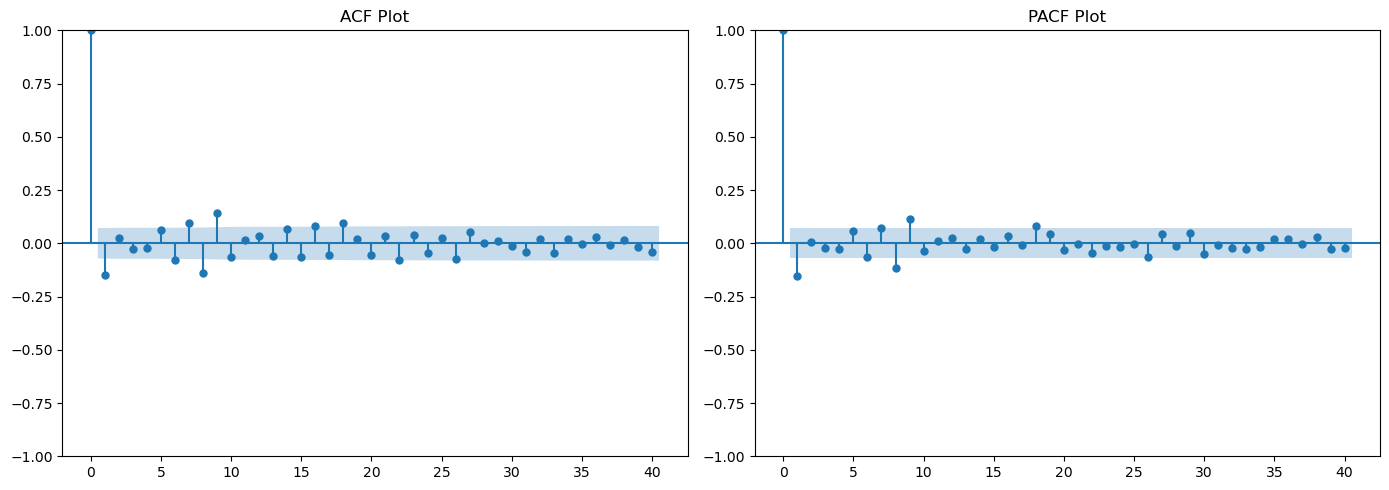

In [5]:
# ACF and PACF plots
plt.figure(figsize=(14, 5))
plt.subplot(121)
plot_acf(returns, lags=40, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(returns, lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [6]:
# Fit ARMA(1,1) model
arma_model = ARIMA(returns, order=(1, 0, 1))
arma_fit = arma_model.fit()
print(arma_fit.summary())

# Extract residuals from ARMA model
arma_resid = arma_fit.resid


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  755
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1777.291
Date:                Thu, 01 Aug 2024   AIC                          -3546.582
Time:                        15:09:34   BIC                          -3528.075
Sample:                             0   HQIC                         -3539.453
                                - 755                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.362      0.173      -0.000       0.002
ar.L1         -0.1831      0.160     -1.145      0.252      -0.496       0.130
ma.L1          0.0331      0.167      0.198      0.8

/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
# Fit GARCH(1,1) model to the residuals
garch_model = arch_model(arma_resid, vol='GARCH', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 16741355297222.602
Iteration:      2,   Func. Count:     18,   Neg. LLF: 26898.7368241037
Iteration:      3,   Func. Count:     28,   Neg. LLF: 46342749468392.1
Iteration:      4,   Func. Count:     40,   Neg. LLF: 36770623285.28815
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1842.7642616703804
            Iterations: 5
            Function evaluations: 50
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1842.76
Distribution:                  Normal   AIC:                          -3677.53
Method:            Maximum Likelihood   BIC:                          -3659.02
                              

/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005282. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


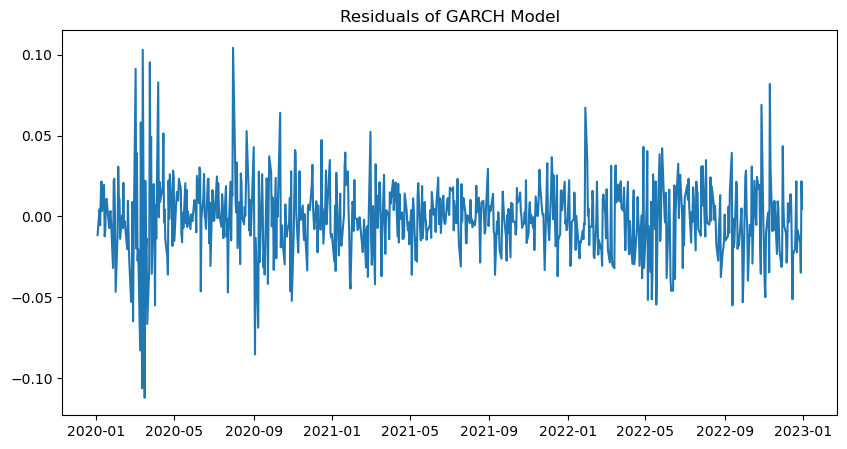

/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


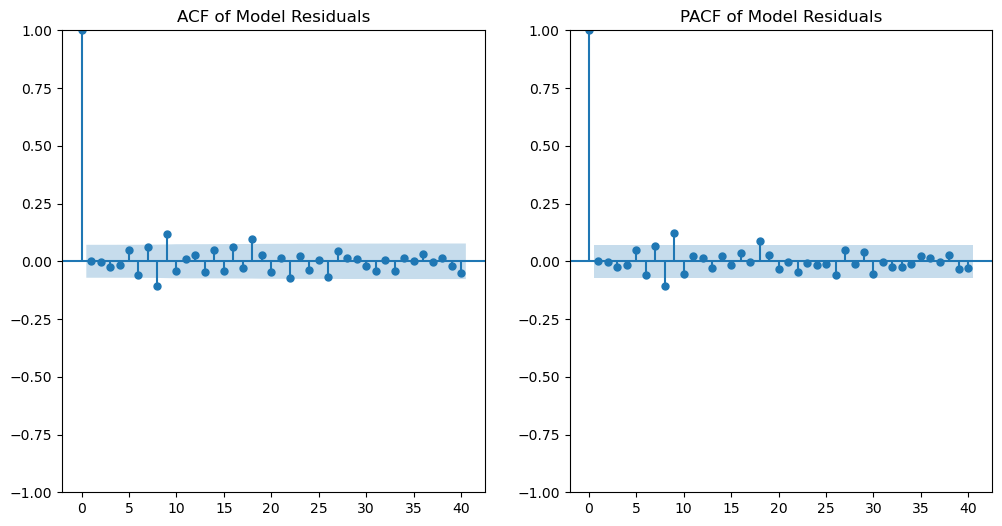

In [29]:
# Get model residuals
modresid = garch_fit.resid
plt.figure(figsize=(10, 5))
plt.plot(modresid)
plt.title('Residuals of GARCH Model')
plt.show()

# Check ACF and PACF of model residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(modresid, lags=40, ax=plt.gca())
plt.title('ACF of Model Residuals')

plt.subplot(122)
plot_pacf(modresid, lags=40, ax=plt.gca())
plt.title('PACF of Model Residuals')
plt.show()

/Users/yuhanfu/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


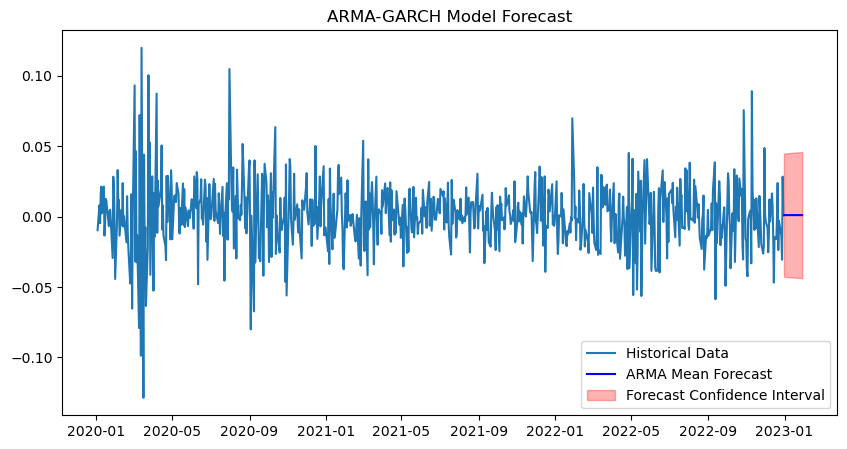

In [12]:
# Forecasting future values
forecast_horizon = 30

# Forecast ARMA model
arma_forecast = arma_fit.get_forecast(steps=forecast_horizon)
arma_pred_mean = arma_forecast.predicted_mean

# Forecast GARCH model
garch_forecast = garch_fit.forecast(horizon=forecast_horizon)
garch_forecast_variance = garch_forecast.variance.iloc[-1].values

# Combine ARMA mean forecast and GARCH variance forecast
forecast_index = pd.date_range(start=returns.index[-1] + pd.DateOffset(days=1), periods=forecast_horizon, freq='D')

# Calculate confidence intervals
lower_bound = arma_pred_mean - 2 * np.sqrt(garch_forecast_variance)
upper_bound = arma_pred_mean + 2 * np.sqrt(garch_forecast_variance)

# Plotting the forecasts
plt.figure(figsize=(10, 5))
plt.plot(returns.index, returns, label='Historical Data')
plt.plot(forecast_index, arma_pred_mean, label='ARMA Mean Forecast', color='blue')
plt.fill_between(forecast_index, lower_bound, upper_bound, color='red', alpha=0.3, label='Forecast Confidence Interval')
plt.title('ARMA-GARCH Model Forecast')
plt.legend()
plt.show()